### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape, test.shape

((891, 12), (418, 11))

In [6]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Exploring the Given Data

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# The Column Age contains almost 20% missing values and therefore we would need to impute them
train['Age'].isnull().sum()/len(train) * 100

19.865319865319865

In [11]:
# The Coulumn Cabin contains 77% missing values therefore, will simply drop this column
train['Cabin'].isnull().sum()/len(train) * 100

77.10437710437711

In [12]:
# Dropping the columns - Cabin and Ticket Number. The ticket no is of no use in model building.
train.drop(['Cabin','Ticket'], axis=1, inplace=True)
test.drop(['Cabin','Ticket'], axis=1, inplace=True)

In [13]:
# Finding the survived percentage of people belonging to different Passenger Classes
# First Class people survived in large numbers

train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
# Looking at different ages and the number of people survived of that age

train[['Age','Survived']].groupby(['Age'], as_index=False).sum()

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
...,...,...
83,70.00,0
84,70.50,0
85,71.00,0
86,74.00,0


In [15]:
# Survived percentage of females was 74% while of males was close to 19%

train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
# People travelling with one siblings or spouse have higher survival percentage

train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
# Looking at passengers travelling with Parents or Children and their survival rate

train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [18]:
# The survival rate of people embarking from Cherbourg was highest

train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# Visualization

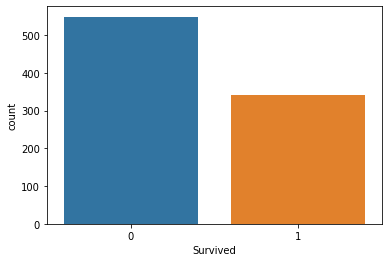

In [19]:
# Count of People who survived and who didn't

sns.countplot(x="Survived", data=train)

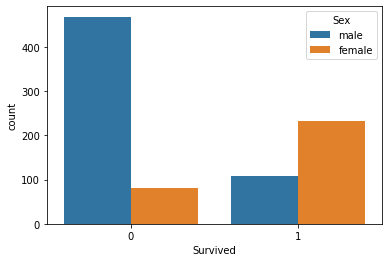

In [20]:
# Count of Gender of People who survived and who didn't. Clearly, survival rate of males was very low.

sns.countplot(x="Survived", hue="Sex", data=train)

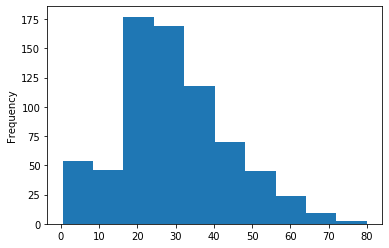

In [21]:
# Distribution of Ages. Most passengers belonging to 20-40 age bracket.

train['Age'].plot.hist()

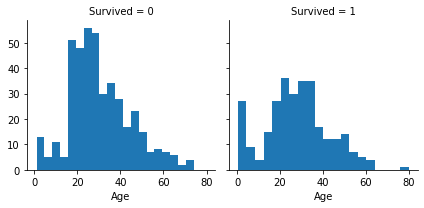

In [22]:
# Plotting Ages with Survival

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

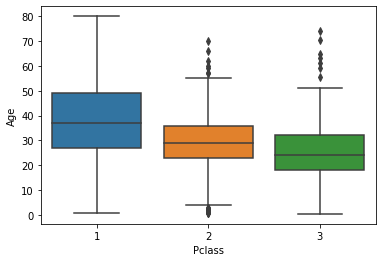

In [23]:
# Found that the passengers in third class consisted of youth

sns.boxplot(x="Pclass", y="Age", data=train)

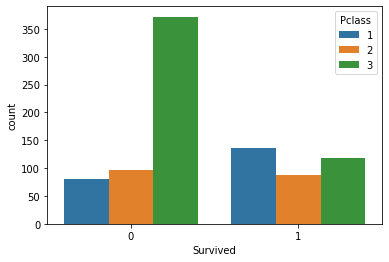

In [24]:
# Survival rate of Third Class people was very low

sns.countplot(x="Survived", hue="Pclass", data=train)

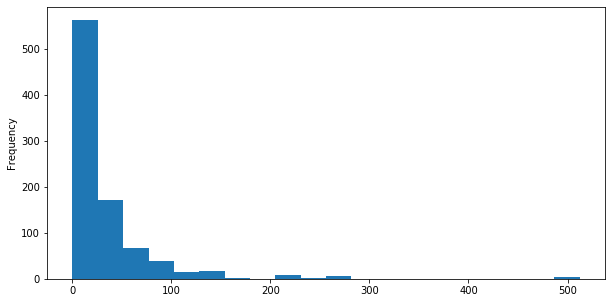

In [25]:
# The Fare is rightly-skewed. Falling mostly in the 0-100 bucket.

train['Fare'].plot.hist(bins = 20, figsize=(10,5))

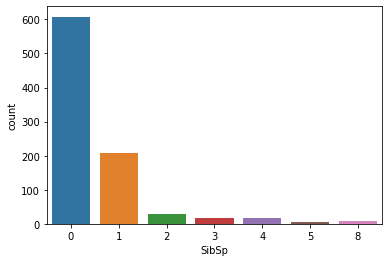

In [26]:
# Most of the passengers were not travelling with Siblings or Spouse

sns.countplot(x="SibSp", data=train)

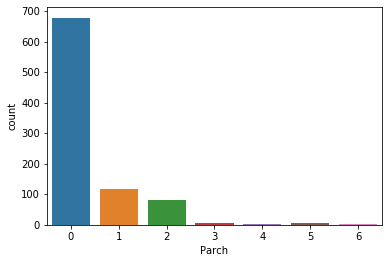

In [27]:
# Most of the passengers were not travelling with Parents or Children

sns.countplot(x="Parch", data=train)

# Handling Null Values

In [28]:
# Age has 177 null values while Embarked contains 2

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

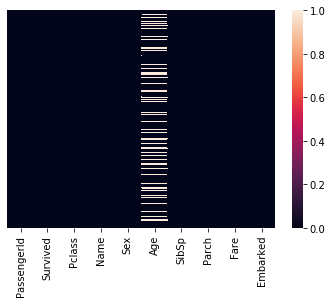

In [29]:
# Heatmap is also a way of finding null values. Its mostly used in case of a large dataset.

sns.heatmap(train.isnull(), yticklabels=False)

In [30]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [31]:
# Count of passengers from different port of Embarkation
# C = Cherbourg, Q = Queenstown, S = Southampton

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
# Filling the two missing values with the mode of the column, S = Southampton

train['Embarked'] = train['Embarked'].fillna('S')

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [34]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [35]:
train['Age'] = np.round(train['Age'],0)

In [36]:
# Mean ages of people travelling in different Passenger Classes

train[['Pclass','Age']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Age
0,1,38.236559
1,2,29.872832
2,3,25.129577


In [37]:
# Since Mean age is different for people travelling in different Classes
# Imputing the null values in Age in accordance with the PClass they are travelling in

train.loc[(train['Age'].isnull()) & (train['Pclass'] == 1), 'Age'] = 38
train.loc[(train['Age'].isnull()) & (train['Pclass'] == 2), 'Age'] = 30
train.loc[(train['Age'].isnull()) & (train['Pclass'] == 3), 'Age'] = 25

In [38]:
# Similarly for Test Dataset, the mean ages of people travelling in different PClasses is different

test[['Pclass','Age']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Age
0,1,40.918367
1,2,28.777500
2,3,24.027945


In [39]:
# Imputation done in a similar way

test.loc[(train['Age'].isnull()) & (test['Pclass'] == 1), 'Age'] = 41
test.loc[(train['Age'].isnull()) & (test['Pclass'] == 2), 'Age'] = 29
test.loc[(train['Age'].isnull()) & (test['Pclass'] == 3), 'Age'] = 24

In [40]:
# There was one missing record of Fare in Test data, filled it using the mean of the column

test.fillna(test['Fare'].mean(), inplace = True)

In [41]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [42]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [43]:
# ALl the null values are treated

# Feature Extraction

In [44]:
# Doing One-hot encoding for categorical columns Sex and Embarked on both train and test data

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
train['Sex'] = le.fit_transform(train['Sex']) #M = 1 and f = 0
train['Embarked'] = le.fit_transform(train['Embarked']) #S = 2, C = 0 and Q = 1
test['Sex'] = le.fit_transform(test['Sex']) #M = 1 and f = 0
test['Embarked'] = le.fit_transform(test['Embarked']) #S = 2, C = 0 and Q = 1

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2


In [47]:
# Extracting Titles from Names

train['Title']=train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [48]:
# Extracting Titles from Names

test['Title']=test['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,Mr


In [50]:
# Counting the titles

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Countess      1
Mme           1
Jonkheer      1
Lady          1
Ms            1
Capt          1
Sir           1
Name: Title, dtype: int64

In [51]:
# Mapping the less frequent titles with other

Title_mapping = {'Dr':'Others','Rev':'Others','Mile':'Others','Col':'Others','Major':'Others','Capt':'Others','Don':'Others','Lady':'Others','Jonkheer':'Others','Mme':'Others','Countess':'Others','Sir':'Others','Ms':'Others','Mlle':'Others','Dona':'Others'}
train['Title'] = train['Title'].replace(Title_mapping)
test['Title'] = test['Title'].replace(Title_mapping)

In [52]:
# Performed one-hot encoding on Title column as well

train['Title']= le.fit_transform(train['Title'])
test['Title']= le.fit_transform(test['Title'])

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,2


In [54]:
# Dropped the Name column as it is of no use now

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,0,3
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,3
4,5,0,3,1,35.0,0,0,8.0500,2,2


In [56]:
# Most passengers onboard are of age 25

train['Age'].value_counts()

25.0    159
38.0     41
30.0     38
24.0     32
22.0     27
       ... 
66.0      1
0.0       1
80.0      1
12.0      1
74.0      1
Name: Age, Length: 71, dtype: int64

In [57]:
# Converting the Ages into age groups so as to make it easier for the model to make predictions

train['Age group'] = pd.cut(train['Age'], 5)
test['Age group'] = pd.cut(test['Age'], 5)

In [58]:
# Most passengers belong in the age group of 16-32

train['Age group'].value_counts()

(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Age group, dtype: int64

In [59]:
# One hot encoding done on Age groups so that it becomes simplified
# Stored the encoded values in the original Age column

train['Age']= le.fit_transform(train['Age group'])
test['Age']= le.fit_transform(test['Age group'])

In [60]:
train['Age'].value_counts()

1    495
2    216
0    100
3     69
4     11
Name: Age, dtype: int64

In [61]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age group
0,1,0,3,1,1,1,0,7.2500,2,2,"(16.0, 32.0]"
1,2,1,1,0,2,1,0,71.2833,0,3,"(32.0, 48.0]"
2,3,1,3,0,1,0,0,7.9250,2,1,"(16.0, 32.0]"
3,4,1,1,0,2,1,0,53.1000,2,3,"(32.0, 48.0]"
4,5,0,3,1,2,0,0,8.0500,2,2,"(32.0, 48.0]"


In [62]:
# Dropping the Age Group column as our work is done

train.drop('Age group', axis=1, inplace=True)

In [63]:
test.drop('Age group', axis=1, inplace=True)

In [64]:
# Also making buckets of the fares. Grouping them so as to have a simplified approach.

train['Fare group'] = pd.cut(train['Fare'], 4)
test['Fare group'] = pd.cut(test['Fare'], 4)

In [65]:
# Passengers in higher fare groups have higher chances of survival

train[['Fare group','Survived']].groupby(['Fare group'], as_index=False).mean()

,Fare group,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [66]:
# Similarly, did one-hot encoding on the fare groups and stored the encoded values in the original column

train['Fare']= le.fit_transform(train['Fare group'])
test['Fare']= le.fit_transform(test['Fare group'])

In [67]:
train[['Fare','Survived']].groupby(['Fare'], as_index=False).mean()

,Fare,Survived
0,0,0.368113
1,1,0.724138
2,2,0.666667
3,3,1.000000


In [68]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare group
0,1,0,3,1,1,1,0,0,2,2,"(-0.512, 128.082]"
1,2,1,1,0,2,1,0,0,0,3,"(-0.512, 128.082]"
2,3,1,3,0,1,0,0,0,2,1,"(-0.512, 128.082]"
3,4,1,1,0,2,1,0,0,2,3,"(-0.512, 128.082]"
4,5,0,3,1,2,0,0,0,2,2,"(-0.512, 128.082]"


In [69]:
# Dropping the Fare group column as our work is done

train.drop('Fare group', axis=1, inplace=True)
test.drop('Fare group', axis=1, inplace=True)

In [70]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [71]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,0,2,2
1,1,1,0,2,1,0,0,0,3
2,1,3,0,1,0,0,0,2,1
3,1,1,0,2,1,0,0,2,3
4,0,3,1,2,0,0,0,2,2


In [72]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,2,0,0,0,1,2
1,3,0,3,1,0,0,2,3
2,2,1,4,0,0,0,1,2
3,3,1,1,0,0,0,2,2
4,3,0,1,1,1,0,2,3


# Building Model

In [73]:
train_X = train.drop('Survived', axis = 1)  # Independent set of variables
train_y = train['Survived']  # Dependent Variable

In [74]:
train_X.shape, train_y.shape

((891, 8), (891,))

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg_model,train_X, train_y,cv=5)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79888268 0.80337079 0.79775281 0.76966292 0.80337079]
Mean: 0.7946079969870066
Standard Deviation: 0.012680635079286464


In [77]:
preds = lg_model.predict(test)
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

### Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train_X, train_y) * 100, 2)
test_decision_tree = round(decision_tree.score(test, Y_pred) * 100, 2)
print(acc_decision_tree)

87.43


In [79]:
Y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_y)
Y_pred = random_forest.predict(test)
random_forest.score(train_X, train_y)
acc_random_forest = round(random_forest.score(train_X, train_y) * 100, 2)
acc_random_forest

87.43

In [81]:
Y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

# Accuracy given by Models

### Logistic Regression = 79.46
### Decision Trees = 87.43
### Random Forest = 87.43

### Therefore, going with Random Forest

In [82]:
passIDs = pd.read_csv("test.csv")[["PassengerId"]].values

In [83]:
df_for_submission = {'PassengerId': passIDs.ravel(), 'Survived': Y_pred}
df_submission_predictions = pd.DataFrame(df_for_submission).set_index(['PassengerId'])
df_submission_predictions.head(10)

In [84]:
df_submission_predictions.to_csv('MySubmission.csv')